In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.distance import geodesic

In [2]:
df = pd.read_csv('bluebike.csv')

link: https://www.kaggle.com/jackdaoud/bluebikes-in-boston

data for 2019 only

In [3]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,year,month
0,790,2019-12-01 00:01:25.3240,2019-12-01 00:14:35.3350,370,Dartmouth St at Newbury St,42.350961,-71.077828,33,Kenmore Square,42.348706,-71.097009,5133,Subscriber,1950,1,2019,12
1,166,2019-12-01 00:05:42.8610,2019-12-01 00:08:29.3830,80,MIT Stata Center at Vassar St / Main St,42.362131,-71.091156,67,MIT at Mass Ave / Amherst St,42.358100,-71.093198,2653,Subscriber,1993,1,2019,12
2,323,2019-12-01 00:08:28.5560,2019-12-01 00:13:52.4340,381,Inman Square at Springfield St.,42.374384,-71.100157,221,Verizon Innovation Hub 10 Ware Street,42.372509,-71.113054,4875,Subscriber,1992,1,2019,12
3,709,2019-12-01 00:08:38.5970,2019-12-01 00:20:27.6470,185,Third at Binney,42.365445,-71.082771,184,Sidney Research Campus/ Erie Street at Waverly,42.357753,-71.103934,2116,Subscriber,1997,1,2019,12
4,332,2019-12-01 00:10:08.8160,2019-12-01 00:15:41.0510,221,Verizon Innovation Hub 10 Ware Street,42.372509,-71.113054,89,Harvard Law School at Mass Ave / Jarvis St,42.379011,-71.119945,6156,Subscriber,1985,1,2019,12


In [4]:
#Drop the station id
df.drop('start station id',axis=1,inplace=True)
df.drop('end station id',axis=1,inplace=True)

In [5]:
#Checking data type, null, and total
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2522771 entries, 0 to 2522770
Data columns (total 15 columns):
tripduration               int64
starttime                  object
stoptime                   object
start station name         object
start station latitude     float64
start station longitude    float64
end station name           object
end station latitude       float64
end station longitude      float64
bikeid                     int64
usertype                   object
birth year                 int64
gender                     int64
year                       int64
month                      int64
dtypes: float64(4), int64(6), object(5)
memory usage: 288.7+ MB


In [ ]:
df.describe()

In [11]:
# Check for null data
df.isnull().sum()

tripduration               0
starttime                  0
stoptime                   0
start station name         0
start station latitude     0
start station longitude    0
end station name           0
end station latitude       0
end station longitude      0
bikeid                     0
usertype                   0
birth year                 0
gender                     0
year                       0
month                      0
dtype: int64

In [ ]:
dfhead=df.head(5)

In [ ]:
# Alt 1 for calculate distance

def distance(x):
    l1 = (x['start station latitude'],x['start station longitude'])
    l2 = (x['end station latitude'],x['end station longitude'])
    
    return geodesic(l1,l2).km

df['distance']=df.apply(distance,axis=1)

# This takes too long so i will be using alt 2

In [12]:
# Alt 2 for calculate distance

def dist_from_coordinates(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in km

    #conversion to radians
    d_lat = np.radians(lat2-lat1)
    d_lon = np.radians(lon2-lon1)

    r_lat1 = np.radians(lat1)
    r_lat2 = np.radians(lat2)

    #haversine formula
    a = np.sin(d_lat/2.) **2 + np.cos(r_lat1) * np.cos(r_lat2) * np.sin(d_lon/2.)**2

    haversine = 2 * R * np.arcsin(np.sqrt(a))

    return haversine

new_column = []                    #empty column for distance
for index,row in df.iterrows():
    lat1 = row['start station latitude'] #first row of location.lat column here
    lon1 = row['start station longitude'] #first row of location.long column here
    lat2 = row['end station latitude'] #second row of location.lat column here
    lon2 = row['end station longitude'] #second row of location.long column here
    value = dist_from_coordinates(lat1, lon1, lat2, lon2)  #get the distance
    new_column.append(value)   #append the empty list with distance values

df.insert(1,"distance",new_column)

In [13]:
df.head()

,tripduration,distance,starttime,stoptime,start station name,start station latitude,start station longitude,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,year,month
0,790,1.596076,2019-12-01 00:01:25.3240,2019-12-01 00:14:35.3350,Dartmouth St at Newbury St,42.350961,-71.077828,Kenmore Square,42.348706,-71.097009,5133,Subscriber,1950,1,2019,12
1,166,0.478624,2019-12-01 00:05:42.8610,2019-12-01 00:08:29.3830,MIT Stata Center at Vassar St / Main St,42.362131,-71.091156,MIT at Mass Ave / Amherst St,42.358100,-71.093198,2653,Subscriber,1993,1,2019,12
2,323,1.079709,2019-12-01 00:08:28.5560,2019-12-01 00:13:52.4340,Inman Square at Springfield St.,42.374384,-71.100157,Verizon Innovation Hub 10 Ware Street,42.372509,-71.113054,4875,Subscriber,1992,1,2019,12
3,709,1.937748,2019-12-01 00:08:38.5970,2019-12-01 00:20:27.6470,Third at Binney,42.365445,-71.082771,Sidney Research Campus/ Erie Street at Waverly,42.357753,-71.103934,2116,Subscriber,1997,1,2019,12
4,332,0.918276,2019-12-01 00:10:08.8160,2019-12-01 00:15:41.0510,Verizon Innovation Hub 10 Ware Street,42.372509,-71.113054,Harvard Law School at Mass Ave / Jarvis St,42.379011,-71.119945,6156,Subscriber,1985,1,2019,12


In [14]:
df['distance'] = df['distance'].round(3)

In [19]:
df.describe()

,tripduration,distance,start station latitude,start station longitude,end station latitude,end station longitude,bikeid,birth year,gender,year,month
count,2.522771e+06,2.522771e+06,2.522771e+06,2.522771e+06,2.522771e+06,2.522771e+06,2.522771e+06,2.522771e+06,2.522771e+06,2522771.0,2.522771e+06
mean,2.178407e+03,2.007465e+00,4.235746e+01,-7.108794e+01,4.235732e+01,-7.108749e+01,3.637649e+03,1.984724e+03,1.124730e+00,2019.0,7.298523e+00
std,1.098031e+05,1.691030e+01,5.584549e-02,9.302137e-02,7.722553e-02,1.291085e-01,1.287294e+03,1.154858e+01,5.738727e-01,0.0,2.708278e+00
min,6.100000e+01,0.000000e+00,0.000000e+00,-7.116649e+01,0.000000e+00,-7.116649e+01,1.000000e+00,1.886000e+03,0.000000e+00,2019.0,1.000000e+00
25%,4.180000e+02,9.830000e-01,4.234871e+01,-7.110441e+01,4.234871e+01,-7.110441e+01,2.745000e+03,1.977000e+03,1.000000e+00,2019.0,5.000000e+00
50%,7.070000e+02,1.638000e+00,4.235810e+01,-7.108981e+01,4.235810e+01,-7.108822e+01,3.670000e+03,1.989000e+03,1.000000e+00,2019.0,8.000000e+00
75%,1.185000e+03,2.645000e+00,4.236599e+01,-7.106892e+01,4.236599e+01,-7.106781e+01,4.497000e+03,1.994000e+03,1.000000e+00,2019.0,9.000000e+00
max,4.256714e+07,8.469404e+03,4.241480e+01,0.000000e+00,4.241480e+01,0.000000e+00,6.173000e+03,2.003000e+03,2.000000e+00,2019.0,1.200000e+01


In [20]:
# drop latitude and longitude since we've got the distance and wont be using it anymore

df.drop('start station latitude',axis=1,inplace=True)
df.drop('start station longitude',axis=1,inplace=True)
df.drop('end station latitude',axis=1,inplace=True)
df.drop('end station longitude',axis=1,inplace=True)

In [21]:
df.head()

,tripduration,distance,starttime,stoptime,start station name,end station name,bikeid,usertype,birth year,gender,year,month
0,790,1.596,2019-12-01 00:01:25.3240,2019-12-01 00:14:35.3350,Dartmouth St at Newbury St,Kenmore Square,5133,Subscriber,1950,1,2019,12
1,166,0.479,2019-12-01 00:05:42.8610,2019-12-01 00:08:29.3830,MIT Stata Center at Vassar St / Main St,MIT at Mass Ave / Amherst St,2653,Subscriber,1993,1,2019,12
2,323,1.080,2019-12-01 00:08:28.5560,2019-12-01 00:13:52.4340,Inman Square at Springfield St.,Verizon Innovation Hub 10 Ware Street,4875,Subscriber,1992,1,2019,12
3,709,1.938,2019-12-01 00:08:38.5970,2019-12-01 00:20:27.6470,Third at Binney,Sidney Research Campus/ Erie Street at Waverly,2116,Subscriber,1997,1,2019,12
4,332,0.918,2019-12-01 00:10:08.8160,2019-12-01 00:15:41.0510,Verizon Innovation Hub 10 Ware Street,Harvard Law School at Mass Ave / Jarvis St,6156,Subscriber,1985,1,2019,12


### New updated CSV

In [22]:
df.to_csv('data_bike_update.csv')

In [68]:
df = pd.read_csv('data_bike_update.csv')

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2522771 entries, 0 to 2522770
Data columns (total 13 columns):
tripduration          int64
distance(km)          float64
starttime             datetime64[ns]
stoptime              datetime64[ns]
start station name    object
end station name      object
bikeid                int64
usertype              object
birth year            int64
gender                int64
month                 int64
hour                  int64
date                  object
dtypes: datetime64[ns](2), float64(1), int64(6), object(4)
memory usage: 250.2+ MB


In [34]:
df.isna().sum()

Unnamed: 0            0
tripduration          0
distance              0
starttime             0
stoptime              0
start station name    0
end station name      0
bikeid                0
usertype              0
birth year            0
gender                0
year                  0
month                 0
dtype: int64

In [35]:
df['year'].unique()

array([2019], dtype=int64)

In [27]:
df['gender'].unique()

array([1, 2, 0], dtype=int64)

In [69]:
df.rename(columns={'distance':'distance(km)'},inplace=True)
df.drop('Unnamed: 0',axis=1,inplace=True)

# Since we know its only 2019 and we only want to analyze the activity in 2019 we can safely drop the year
df.drop('year',axis=1,inplace=True)

In [70]:
# Datetime Data Type

df['starttime'] = pd.to_datetime(df['starttime'])
df['stoptime'] = pd.to_datetime(df['stoptime'])

# Add hour and date
df['hour'] = df['starttime'].dt.hour
df['date'] = df['starttime'].dt.date
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].dt.strftime('%d/%m/%Y')
df['month'] = df['starttime'].dt.month
df['nameday'] = df['starttime'].dt.day_name()

day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['nameday'] = pd.Categorical(df['nameday'], categories=day, ordered=True)

In [71]:
# Weekend & Weekday

week = []

for x in df['nameday']:
    if x == 'Saturday' or x == 'Sunday':
        week.append('Weekend')
    else:
        week.append('Weekday')
        
df['weekday/end'] = week

In [72]:
# Add age
df['age'] = 2019 - df['birth year']

In [73]:
#specify gender

df['gender'] = np.where(df['gender'] == 0, 'unknown', 
                 np.where(df['gender'] == 1, 'male',
                 np.where(df['gender'] == 2, 'female', '')))

In [140]:
df.head()

,tripduration,distance(km),starttime,stoptime,start station name,end station name,bikeid,usertype,birth year,gender,month,hour,date,nameday,weekday/end,age
0,790,1.596,2019-12-01 00:01:25.324,2019-12-01 00:14:35.335,Dartmouth St at Newbury St,Kenmore Square,5133,Subscriber,1950,male,12,0,01/12/2019,Sunday,Weekend,69
1,166,0.479,2019-12-01 00:05:42.861,2019-12-01 00:08:29.383,MIT Stata Center at Vassar St / Main St,MIT at Mass Ave / Amherst St,2653,Subscriber,1993,male,12,0,01/12/2019,Sunday,Weekend,26
2,323,1.080,2019-12-01 00:08:28.556,2019-12-01 00:13:52.434,Inman Square at Springfield St.,Verizon Innovation Hub 10 Ware Street,4875,Subscriber,1992,male,12,0,01/12/2019,Sunday,Weekend,27
3,709,1.938,2019-12-01 00:08:38.597,2019-12-01 00:20:27.647,Third at Binney,Sidney Research Campus/ Erie Street at Waverly,2116,Subscriber,1997,male,12,0,01/12/2019,Sunday,Weekend,22
4,332,0.918,2019-12-01 00:10:08.816,2019-12-01 00:15:41.051,Verizon Innovation Hub 10 Ware Street,Harvard Law School at Mass Ave / Jarvis St,6156,Subscriber,1985,male,12,0,01/12/2019,Sunday,Weekend,34


## Goals

This data is provided by BlueBike, a bike sharing company based on US. There is no major problem they currently face, however they want to maximize profit.

There are several goals for this bike sharing data analysis:

1. Convert their current customer and new customer to subscribe as monthly or annual member
2. Optimize the amount of bike in the station since some station dont have many user while the other is crowded

## Analysis

### Based on age

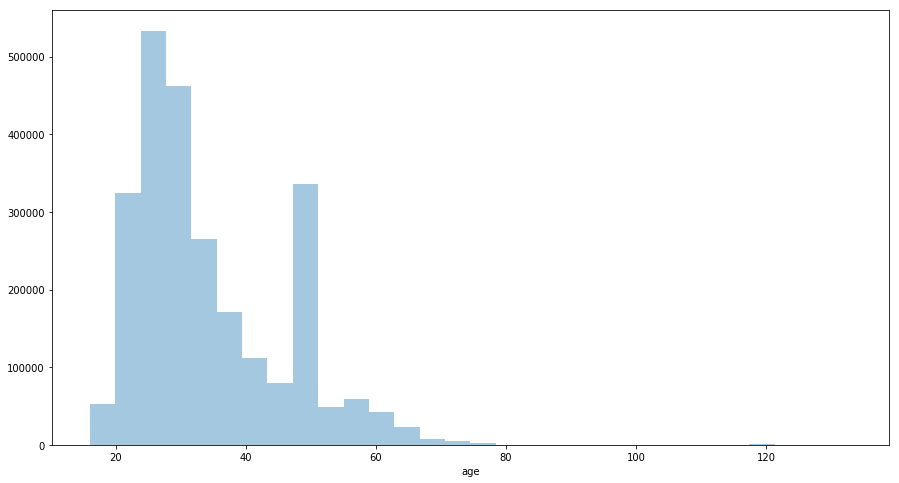

In [74]:
# Plot based on age

plt.figure(figsize=(15,8))
sns.distplot(df['age'], kde=False, bins=30)
plt.show()

There seems to be an unusual data on birthyear because there's someone at age above 100 that rode a bike, very unlikely! even at the age of 90 seems kinda unbelivable, because of that we might want to drop those outlier

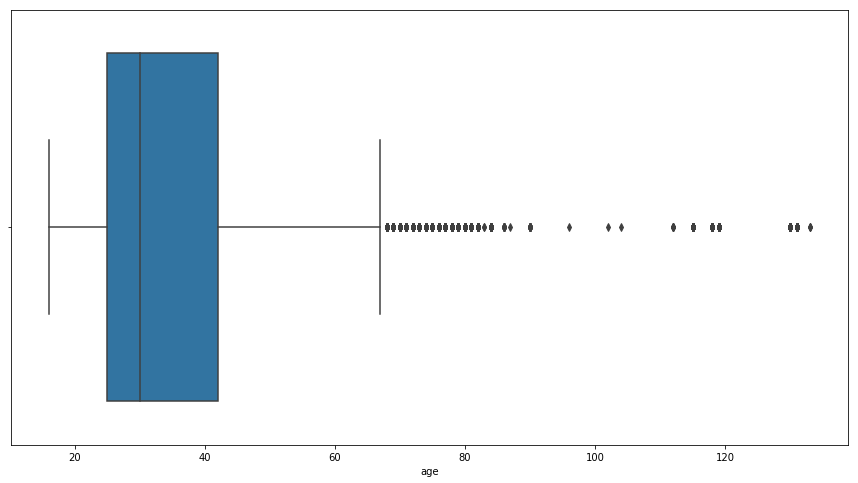

In [75]:
plt.figure(figsize=(15,8))

sns.boxplot(df['age'])
plt.show()

In [76]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)

IQR = Q3 - Q1

lower_fence = Q1 - 1.5*IQR
upper_fence = Q3 + 1.5*IQR

print(f'the upper fence is {upper_fence}')
print(f'the lower fence is {lower_fence}')

the upper fence is 67.5
the lower fence is -0.5


I decide to remove the outlier because of several reasons:

1. Its very rare that people at the age of 67 above rent a bike, even if they did, it has a high risk of injuries, resulting a high trip duration and low trip distance which is not the case for the majority of customer (customer at the age below 67)

2. There is some error in the data where the user age is above 100 which is not possible (for riding a bike)

In [77]:
# Removing the outlier

df.drop(df[df['age']>upper_fence].index,inplace=True)

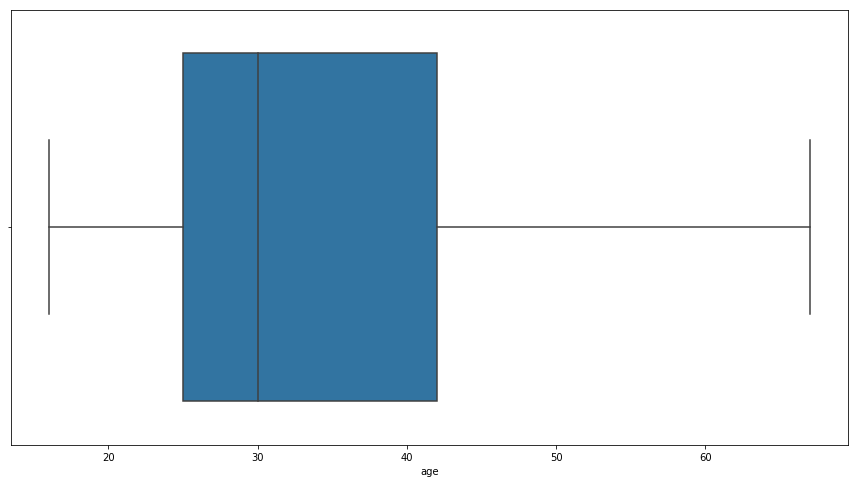

In [78]:
# Boxplot after remove the outlier

plt.figure(figsize=(15,8))

sns.boxplot(df['age'])
plt.show()

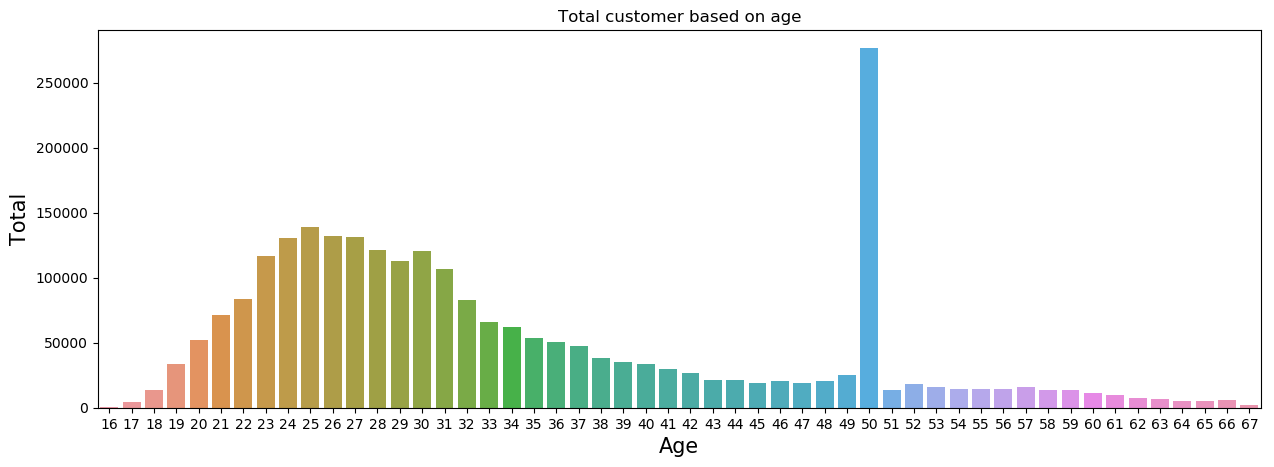

In [85]:
trip_by_age = df.groupby('age', as_index=False)['bikeid'].count().rename(columns={'bikeid': 'total'})
    
plt.figure(figsize=(15,5),dpi=100)
sns.barplot(data=trip_by_age, x='age', y='total')

plt.title('Total customer based on age')
plt.ylabel('Total',size=15)
plt.xlabel('Age',size=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [80]:
df['birth year'].mode()

0    1969
dtype: int64

Even when we've already taken out the outlier, there still seems to be an anomaly in the data, there is a staggering amount of user precisely at the age of 50.

My hypothesis is that the default age when people register if they did not specify the birth year, it automatically result 1969 which is why the most frequent (mode) age is 50 

Which is why i suggest a quick fix on this to make sure the birthyear field is mandatory

### Distance

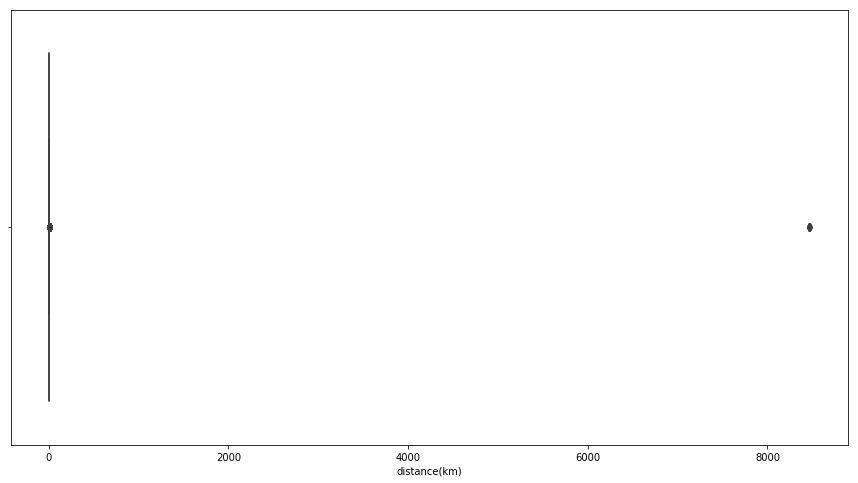

In [81]:
plt.figure(figsize=(15,8))
sns.boxplot(df['distance(km)'])
plt.show()

There is a very unusual data where the distance is more than 8000 km which is not possible, hence we will drop that particular data

In [82]:
df=df[df['distance(km)']<1000]

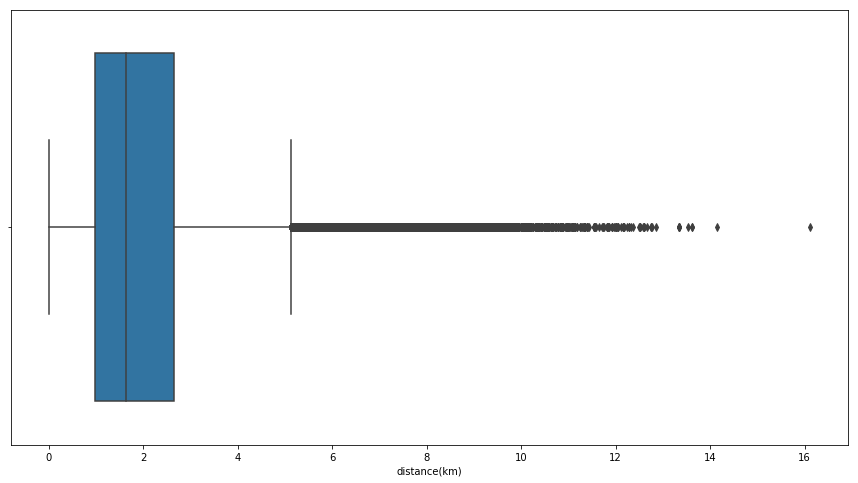

In [83]:
plt.figure(figsize=(15,8))
sns.boxplot(df['distance(km)'])
plt.show()

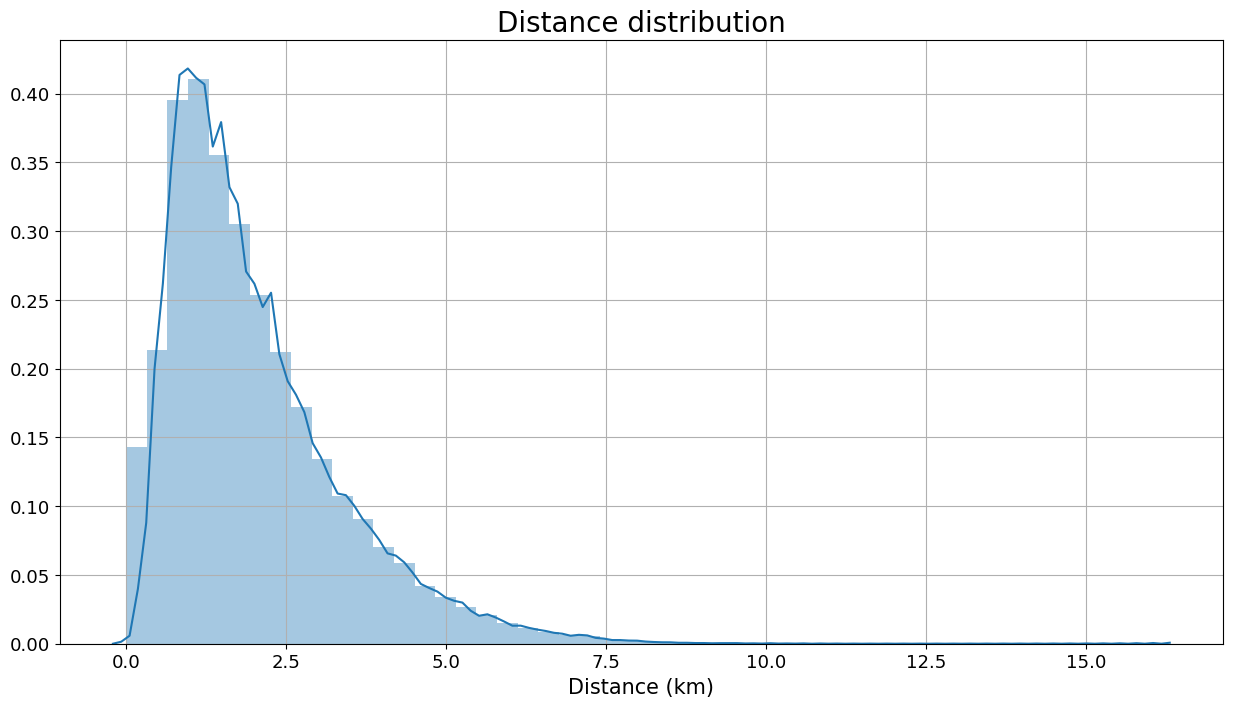

In [87]:
plt.figure(figsize=(15,8),dpi=100)
sns.distplot(df['distance(km)'])

plt.title('Distance distribution',size = 20)
plt.xlabel('Distance (km)',size=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid()
plt.show()

- Based on the graph we can see that people mostly traveled around 1 km and the distribution is expectedly right skewed
- Even though there are many outliers, i choose not to remove it as they are part of what im observing because they might be part of cycling enthusiast
- However, the one that traveled more than 16km (the 8000 one) is removed because we know that that kind of distance is not possible to traveled only through bike

## By User Type

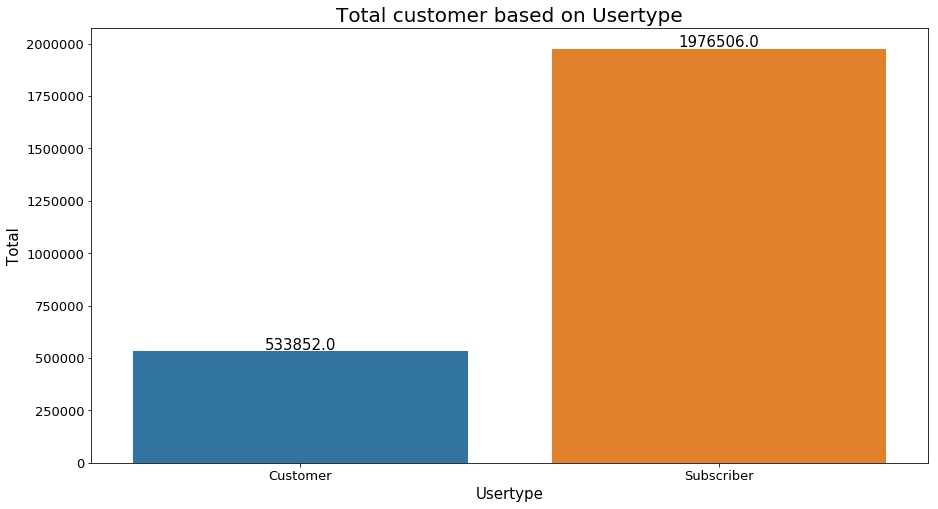

In [89]:
trip_by_type = df.groupby('usertype',as_index=False)['bikeid'].count().rename(columns={'bikeid':'total'})


plt.figure(figsize=(15,8))
splot = sns.barplot(data=trip_by_type, x='usertype', y='total',)

plt.title('Total customer based on Usertype',size = 20)
plt.ylabel('Total',size=15)
plt.xlabel('Usertype',size=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0,6), 
                   textcoords = 'offset points')
plt.show()

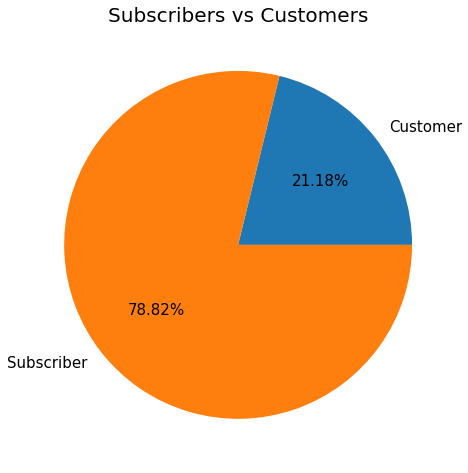

In [157]:
plt.figure(figsize=(10,8))
plt.pie(trip_by_type['total'], labels= trip_by_type['usertype'], textprops={'fontsize': 15},autopct = '%1.2f%%')
plt.title('Subscribers vs Customers', fontsize=20)
plt.show()

In [146]:
trip_by_type

,usertype,total
0,Customer,534277
1,Subscriber,1988494


From the figure above, the proportion of Customer (single trip or day pass user) is far less than the subscriber (monthly or annual pass)

We want to convert those 21% as much as possible to become a subscriber

### Based on gender

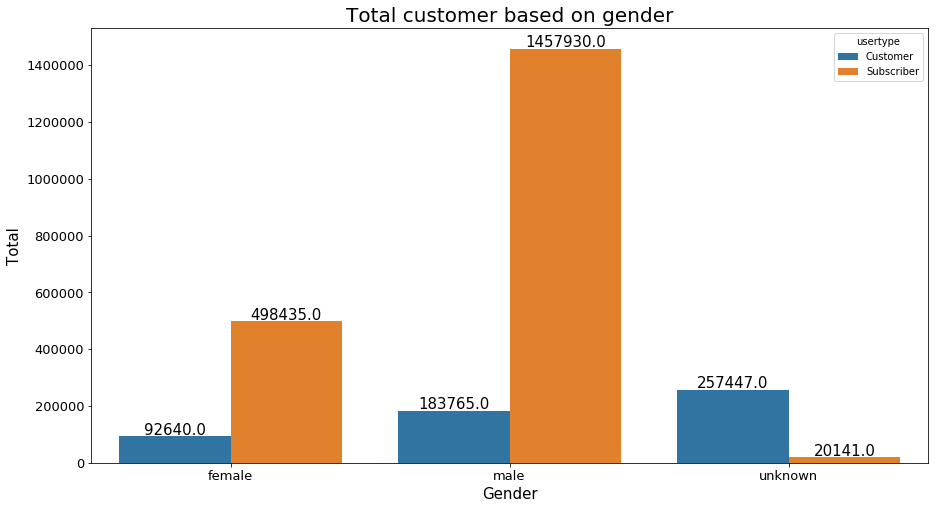

In [90]:
trip_by_gender = df.groupby(['gender','usertype'],as_index=False)['bikeid'].count().rename(columns={'bikeid':'total'})

plt.figure(figsize=(15,8))
splot = sns.barplot(data=trip_by_gender, x='gender', y='total',hue='usertype')

plt.title('Total customer based on gender',size=20)
plt.ylabel('Total',size=15)
plt.xlabel('Gender',size=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0,6), 
                   textcoords = 'offset points')
plt.show()

Based on the graph above the proportion of male is clearly bigger, even if the unknown gender turns out to be all female, male is still the dominant one

### Based on time

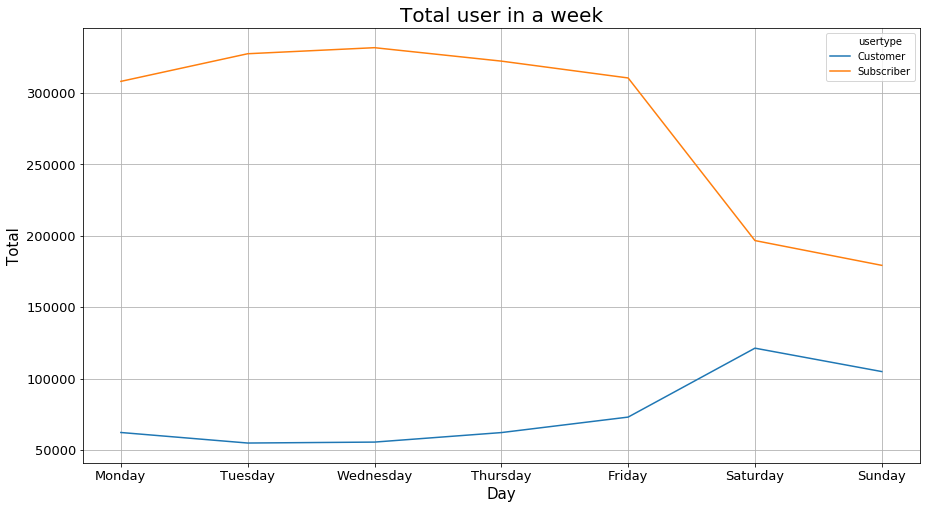

In [93]:
# Trip in a week by user type

trip_per_week = df.groupby(['nameday','usertype'], as_index=False)['bikeid'].count().rename(columns={'bikeid': 'total'})

plt.figure(figsize=(15,8))
sns.lineplot(data=trip_per_week, x='nameday', y='total',hue='usertype')
plt.title('Total user in a week',size=20)
plt.ylabel('Total',size=15)
plt.xlabel('Day',size=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid()
plt.show()

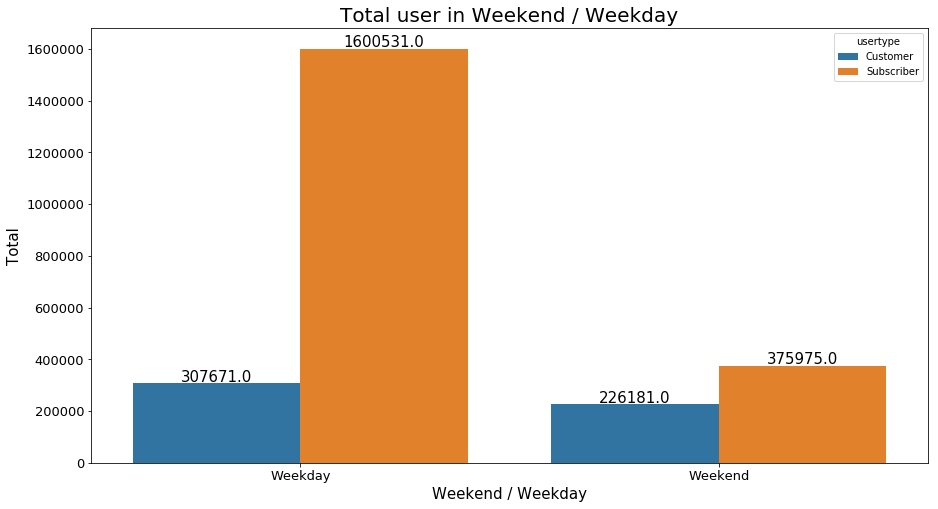

In [96]:
# Trip in a weekend/weekday by user type

trip_per_weekendday = df.groupby(['weekday/end','usertype'], as_index=False)['bikeid'].count().rename(columns={'bikeid': 'total'})

plt.figure(figsize=(15,8))
splot=sns.barplot(data=trip_per_weekendday, x='weekday/end', y='total',hue='usertype')
plt.title('Total user in Weekend / Weekday',size = 20)
plt.ylabel('Total',size=15)
plt.xlabel('Weekend / Weekday',size=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0,6), 
                   textcoords = 'offset points')

plt.show()

In [24]:
trip_per_weekendday

,weekday/end,usertype,total
0,Weekday,Customer,307672
1,Weekday,Subscriber,1600540
2,Weekend,Customer,226181
3,Weekend,Subscriber,375975


In [30]:
weekday = trip_per_weekendday[trip_per_weekendday['weekday/end']=='Weekday']['total'].sum()/5
weekend = trip_per_weekendday[trip_per_weekendday['weekday/end']=='Weekend']['total'].sum()/2

print(f'Total user per day on weekday: {weekday}')
print(f'Total user per day on weekend: {weekend}')

Total user per day on weekday: 381642.4
Total user per day on weekend: 301078.0


- For subscriber, they often use the service usually in weekday but we can see a decline in weekend
- Customer on the other hand, they're most often use the service in weekend
- On weekend, user per day decline around 80,000 users
- However, the composition on weekend for subscriber and customer become very close relatively from weekday

It can be said that most subscriber use the bike to go to work, while most customer use the bike as a leisure

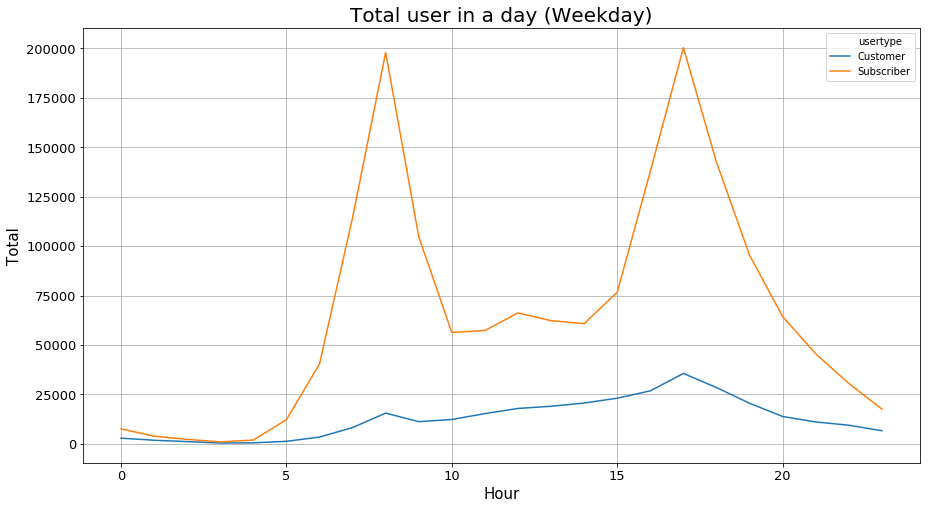

In [98]:
# Trip in a weekday

day = df[df['weekday/end']=='Weekday']
trip_per_day = day.groupby(['hour','usertype'], as_index=False)['bikeid'].count().rename(columns={'bikeid': 'total'})

plt.figure(figsize=(15,8))
sns.lineplot(data=trip_per_day, x='hour', y='total',hue='usertype')
plt.title('Total user in a day (Weekday)',size=20)
plt.ylabel('Total',size=15)
plt.xlabel('Hour',size=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid()
plt.show()

- Similar to our analysis above, in weekday, many subscriber use the service to go to work
- Rush hour starts around 6-8 am and 17 - 18 pm 
- Customer remain stable almost unafected by hour

 Because customer is relatively unafected by hour, there is a chance that people that use it is not for job related unlike subcriber which has a pattern, its probable that they're mostly tourist.

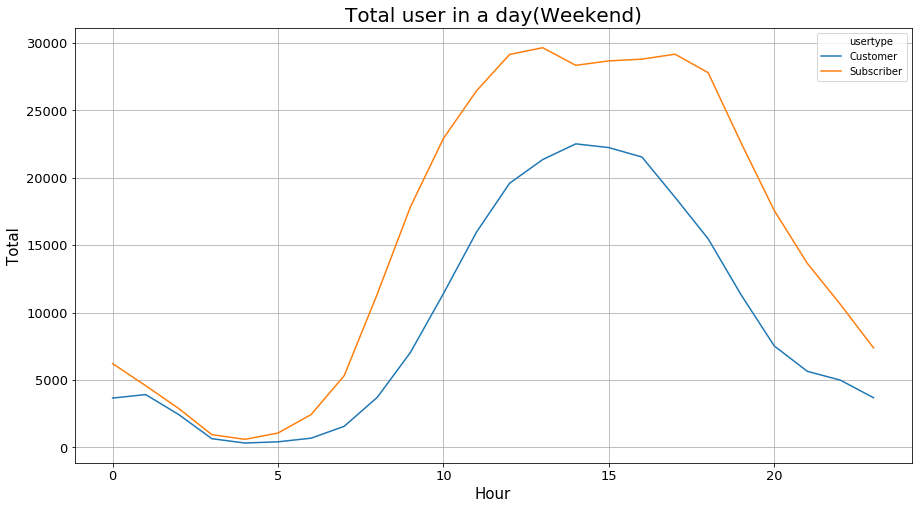

In [99]:
# Trip in a weekday

day = df[df['weekday/end']=='Weekend']
trip_per_day = day.groupby(['hour','usertype'], as_index=False)['bikeid'].count().rename(columns={'bikeid': 'total'})

plt.figure(figsize=(15,8))
sns.lineplot(data=trip_per_day, x='hour', y='total',hue='usertype')
plt.title('Total user in a day(Weekend)',size=20)
plt.ylabel('Total',size=15)
plt.xlabel('Hour',size=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid()
plt.show()

In the weekend however:
- The user pattern between subscriber and customer is similar
- There is no pattern like rush hour in weekday
- Users mostly ride at 10 am to 18 pm 

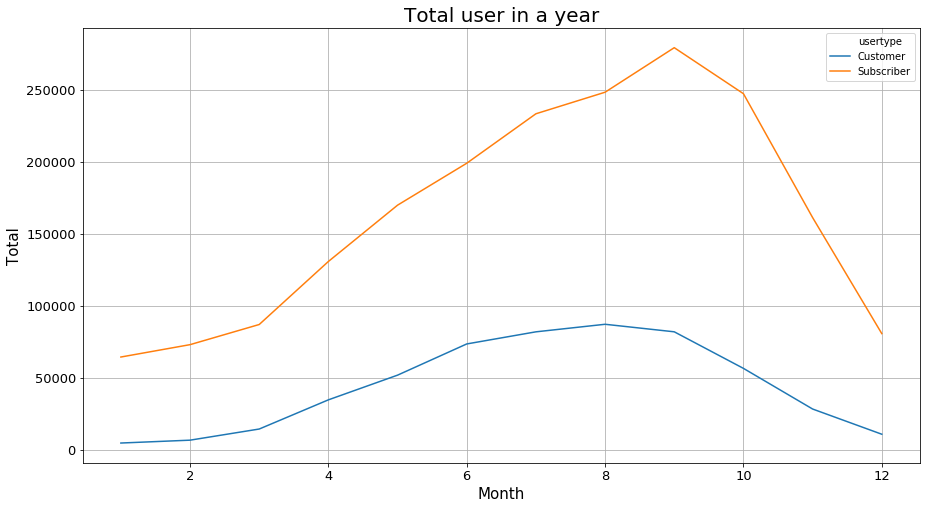

In [100]:
# Trip per month

trip_per_month = df.groupby(['month','usertype'], as_index=False)['bikeid'].count().rename(columns={'bikeid': 'total'})

plt.figure(figsize=(15,8))
sns.lineplot(data=trip_per_month, x='month', y='total',hue='usertype')
plt.title('Total user in a year',size=20)
plt.ylabel('Total',size=15)
plt.xlabel('Month',size=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid()



plt.show()

- The number of rides per month shows a noticable rise and decline in a year
- the peak occurs in September and the minimum occurs near January
- This is likely related to the seasonal weather pattern where summer is the most popular time to ride while in winter less people are likely to ride

## By Station

In [183]:
# Top 10 Start station

df.groupby('start station name', as_index=False)['bikeid'].count().sort_values('bikeid', ascending=False).rename(columns={'bikeid': 'total'}).head(10)

,start station name,total
213,MIT at Mass Ave / Amherst St,61056
84,Central Square at Mass Ave / Essex St,50997
211,MIT Stata Center at Vassar St / Main St,47197
297,South Station - 700 Atlantic Ave,44427
21,Ames St at Main St,39128
199,Kendall T,36917
241,Nashua Street at Red Auerbach Way,36657
173,Harvard Square at Mass Ave/ Dunster,35095
210,MIT Pacific St at Purrington St,34992
212,MIT Vassar St,29787


In [102]:
# Bottom 20 start station


df.groupby('start station name', as_index=False)['bikeid'].count().sort_values('bikeid').rename(columns={'bikeid': 'total'}).head(20)

,start station name,total
214,MTL-ECO5.1-01,1
18,American Legion Hwy at Canterbury St,21
352,Washington St at Walsh Playground,33
231,Mobile Temporary Station,40
297,Spring St at Powell St,49
344,Washington St at Fuller St,50
80,Central Ave at River St,53
234,Mt. Hope St at Hyde Park Ave,65
121,Cummins at American Legion,67
148,Ferry St at Pleasantview Ave,89


In [185]:
# Top 10 End station

df.groupby('end station name', as_index=False)['bikeid'].count().sort_values('bikeid', ascending=False).rename(columns={'bikeid': 'total'}).head(10)

,end station name,total
213,MIT at Mass Ave / Amherst St,56986
84,Central Square at Mass Ave / Essex St,51442
21,Ames St at Main St,46295
241,Nashua Street at Red Auerbach Way,46245
211,MIT Stata Center at Vassar St / Main St,41828
297,South Station - 700 Atlantic Ave,40863
173,Harvard Square at Mass Ave/ Dunster,35990
210,MIT Pacific St at Purrington St,32915
199,Kendall T,32389
212,MIT Vassar St,28517


In [101]:
# Bottom 20 End Station

# Top Start station

df.groupby('end station name', as_index=False)['bikeid'].count().sort_values('bikeid').rename(columns={'bikeid': 'total'}).head(20)

,end station name,total
338,Warehouse Lab PBSC,1
214,MTL-ECO4-01,1
18,American Legion Hwy at Canterbury St,22
231,Mobile Temporary Station,32
353,Washington St at Walsh Playground,35
345,Washington St at Fuller St,55
297,Spring St at Powell St,59
80,Central Ave at River St,61
84,Centre St at Parkway YMCA,97
86,Centre St at W. Roxbury Post Office,98


In [106]:
# Top Route
pd.set_option('display.max_colwidth', -1)
df['route'] = df['start station name'] + ' - ' + df['end station name']

df.groupby('route', as_index=False)['bikeid'].count().sort_values('bikeid', ascending=False).rename(columns={'bikeid': 'total'}).head(10)



,route,total
39428,MIT Pacific St at Purrington St - MIT Stata Center at Vassar St / Main St,4954
39699,MIT Stata Center at Vassar St / Main St - MIT Pacific St at Purrington St,4897
40249,MIT at Mass Ave / Amherst St - MIT Vassar St,4411
40102,MIT at Mass Ave / Amherst St - Beacon St at Massachusetts Ave,4182
39284,MIT Pacific St at Purrington St - Ames St at Main St,4085
15553,Central Square at Mass Ave / Essex St - MIT Pacific St at Purrington St,3982
5803,Beacon St at Massachusetts Ave - MIT at Mass Ave / Amherst St,3933
39970,MIT Vassar St - MIT Stata Center at Vassar St / Main St,3887
39832,MIT Vassar St - Ames St at Main St,3855
20837,Community Path at Cedar Street - Grove St at Community Path,3830


- The top 3 start station are MIT at Mass ave, Central square Mass ave, and MIT Stata center
- The top 3 end station are MIT at Mass ave, Central square Mass ave, and Ames st
- The top route is MIT pacific - MIT Stata

### Conclusion & Recommendation

- Most of our customer age is around 23-32, at that age money can be a heavy consideration to rent a bike, which is why competitive pricing strategy for that age should be considered

- As we discussed before, it very probable that majority of customer that are day pass or single trip are tourist, however in weekend we can see a slight surge which we can assume it came from local because they use it as a leisure for the weekend.

- Since its kind of waste to convert a tourist into subscriber that stay for less than 30 days. We focus on how convert the people who lives there that uses the bike on weekend, hence we can create a monthly or annual package just for weekend to convert the remaining customer.

- There is a decline and rise based on the annual season, because there's a significant drop during the winter, its advisable that there are winter discount for subscriber to increase the number of subscriber

- Ensuring that no station has empty slots is one of the important issue, which means there should always be a bike in that station, this can be done by transfering some of the bike in less frequent station to the most frequent one, in this case the 10 bottom station should transfer about 80% or more bike to other station that are needed



In [ ]:
df.fillna()